## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1          X2        X3        X4         Y
0  48.936757  188.629797  0.959316  2.816135  1.191398
1  38.356039  741.708227  0.627245  6.742217  1.486219
2  25.748087  529.589887  0.127739  1.915871  1.222455
3  35.217406  978.109505  0.833092  9.153494  1.573768
4  33.494264  830.416678  0.521582  8.273808  1.487683


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0581576	total: 57.2ms	remaining: 57.2s
1:	learn: 1.0518461	total: 57.8ms	remaining: 28.9s
2:	learn: 1.0438235	total: 58.3ms	remaining: 19.4s
3:	learn: 1.0358590	total: 58.8ms	remaining: 14.6s
4:	learn: 1.0282008	total: 59.4ms	remaining: 11.8s
5:	learn: 1.0199507	total: 60ms	remaining: 9.94s
6:	learn: 1.0112989	total: 60.4ms	remaining: 8.57s
7:	learn: 1.0025532	total: 60.8ms	remaining: 7.54s
8:	learn: 0.9951151	total: 61.2ms	remaining: 6.74s
9:	learn: 0.9868292	total: 61.6ms	remaining: 6.1s
10:	learn: 0.9797961	total: 62ms	remaining: 5.57s
11:	learn: 0.9713275	total: 62.4ms	remaining: 5.14s
12:	learn: 0.9642772	total: 62.8ms	remaining: 4.77s
13:	learn: 0.9570725	total: 63.2ms	remaining: 4.45s
14:	learn: 0.9485755	total: 63.8ms	remaining: 4.19s
15:	learn: 0.9401367	total: 64.4ms	remaining: 3.96s
16:	learn: 0.9328313	total: 64.8ms	remaining: 3.75s
17:	learn: 0.9261450	total: 65.2ms	remaining: 3.56s
18:	learn: 0.9225652	total: 65.5ms	remaining: 3.3

106:	learn: 0.5101765	total: 104ms	remaining: 871ms
107:	learn: 0.5077756	total: 105ms	remaining: 867ms
108:	learn: 0.5056295	total: 105ms	remaining: 861ms
109:	learn: 0.5036997	total: 106ms	remaining: 855ms
110:	learn: 0.5001521	total: 106ms	remaining: 850ms
111:	learn: 0.4969506	total: 107ms	remaining: 845ms
112:	learn: 0.4941747	total: 107ms	remaining: 840ms
113:	learn: 0.4930194	total: 107ms	remaining: 834ms
114:	learn: 0.4900425	total: 108ms	remaining: 830ms
115:	learn: 0.4873923	total: 108ms	remaining: 825ms
116:	learn: 0.4847696	total: 109ms	remaining: 822ms
117:	learn: 0.4820342	total: 109ms	remaining: 818ms
118:	learn: 0.4798529	total: 110ms	remaining: 815ms
119:	learn: 0.4777136	total: 111ms	remaining: 810ms
120:	learn: 0.4758024	total: 111ms	remaining: 806ms
121:	learn: 0.4724854	total: 111ms	remaining: 800ms
122:	learn: 0.4708350	total: 112ms	remaining: 796ms
123:	learn: 0.4679173	total: 112ms	remaining: 792ms
124:	learn: 0.4660275	total: 112ms	remaining: 787ms
125:	learn: 

284:	learn: 0.2189888	total: 186ms	remaining: 466ms
285:	learn: 0.2181925	total: 186ms	remaining: 465ms
286:	learn: 0.2171446	total: 187ms	remaining: 464ms
287:	learn: 0.2160519	total: 187ms	remaining: 463ms
288:	learn: 0.2154184	total: 188ms	remaining: 461ms
289:	learn: 0.2146457	total: 188ms	remaining: 460ms
290:	learn: 0.2139151	total: 189ms	remaining: 459ms
291:	learn: 0.2129902	total: 189ms	remaining: 458ms
292:	learn: 0.2118417	total: 189ms	remaining: 457ms
293:	learn: 0.2111044	total: 190ms	remaining: 456ms
294:	learn: 0.2105909	total: 190ms	remaining: 454ms
295:	learn: 0.2098304	total: 191ms	remaining: 453ms
296:	learn: 0.2086585	total: 191ms	remaining: 452ms
297:	learn: 0.2076922	total: 191ms	remaining: 451ms
298:	learn: 0.2069953	total: 192ms	remaining: 450ms
299:	learn: 0.2062715	total: 192ms	remaining: 449ms
300:	learn: 0.2053356	total: 193ms	remaining: 448ms
301:	learn: 0.2047509	total: 193ms	remaining: 447ms
302:	learn: 0.2038714	total: 194ms	remaining: 446ms
303:	learn: 

508:	learn: 0.1168981	total: 286ms	remaining: 276ms
509:	learn: 0.1167234	total: 287ms	remaining: 276ms
510:	learn: 0.1166874	total: 287ms	remaining: 275ms
511:	learn: 0.1166466	total: 288ms	remaining: 274ms
512:	learn: 0.1164741	total: 288ms	remaining: 274ms
513:	learn: 0.1160641	total: 289ms	remaining: 273ms
514:	learn: 0.1158942	total: 289ms	remaining: 272ms
515:	learn: 0.1153064	total: 290ms	remaining: 272ms
516:	learn: 0.1147516	total: 290ms	remaining: 271ms
517:	learn: 0.1144291	total: 290ms	remaining: 270ms
518:	learn: 0.1141137	total: 291ms	remaining: 270ms
519:	learn: 0.1138050	total: 291ms	remaining: 269ms
520:	learn: 0.1136395	total: 292ms	remaining: 268ms
521:	learn: 0.1133377	total: 292ms	remaining: 268ms
522:	learn: 0.1129740	total: 293ms	remaining: 267ms
523:	learn: 0.1129348	total: 293ms	remaining: 266ms
524:	learn: 0.1127729	total: 294ms	remaining: 266ms
525:	learn: 0.1126457	total: 294ms	remaining: 265ms
526:	learn: 0.1126117	total: 294ms	remaining: 264ms
527:	learn: 

709:	learn: 0.0753567	total: 368ms	remaining: 150ms
710:	learn: 0.0751199	total: 368ms	remaining: 150ms
711:	learn: 0.0748850	total: 369ms	remaining: 149ms
712:	learn: 0.0745391	total: 369ms	remaining: 149ms
713:	learn: 0.0742624	total: 370ms	remaining: 148ms
714:	learn: 0.0739917	total: 370ms	remaining: 148ms
715:	learn: 0.0736844	total: 370ms	remaining: 147ms
716:	learn: 0.0734546	total: 371ms	remaining: 146ms
717:	learn: 0.0731699	total: 371ms	remaining: 146ms
718:	learn: 0.0729999	total: 372ms	remaining: 145ms
719:	learn: 0.0727770	total: 372ms	remaining: 145ms
720:	learn: 0.0724996	total: 373ms	remaining: 144ms
721:	learn: 0.0722718	total: 373ms	remaining: 144ms
722:	learn: 0.0720067	total: 374ms	remaining: 143ms
723:	learn: 0.0717233	total: 374ms	remaining: 143ms
724:	learn: 0.0714999	total: 374ms	remaining: 142ms
725:	learn: 0.0714298	total: 375ms	remaining: 141ms
726:	learn: 0.0712677	total: 375ms	remaining: 141ms
727:	learn: 0.0710099	total: 375ms	remaining: 140ms
728:	learn: 

934:	learn: 0.0444580	total: 469ms	remaining: 32.6ms
935:	learn: 0.0443067	total: 469ms	remaining: 32.1ms
936:	learn: 0.0442072	total: 470ms	remaining: 31.6ms
937:	learn: 0.0440593	total: 470ms	remaining: 31.1ms
938:	learn: 0.0437982	total: 471ms	remaining: 30.6ms
939:	learn: 0.0437453	total: 471ms	remaining: 30.1ms
940:	learn: 0.0435624	total: 472ms	remaining: 29.6ms
941:	learn: 0.0434351	total: 472ms	remaining: 29.1ms
942:	learn: 0.0431809	total: 472ms	remaining: 28.6ms
943:	learn: 0.0430326	total: 473ms	remaining: 28ms
944:	learn: 0.0429082	total: 473ms	remaining: 27.5ms
945:	learn: 0.0426599	total: 474ms	remaining: 27ms
946:	learn: 0.0426123	total: 475ms	remaining: 26.6ms
947:	learn: 0.0425654	total: 475ms	remaining: 26.1ms
948:	learn: 0.0425190	total: 476ms	remaining: 25.6ms
949:	learn: 0.0423966	total: 476ms	remaining: 25.1ms
950:	learn: 0.0421540	total: 477ms	remaining: 24.6ms
951:	learn: 0.0421081	total: 477ms	remaining: 24ms
952:	learn: 0.0420628	total: 477ms	remaining: 23.5ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

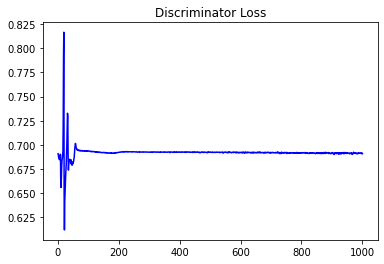

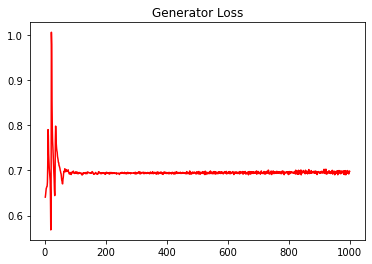

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1942949181274623


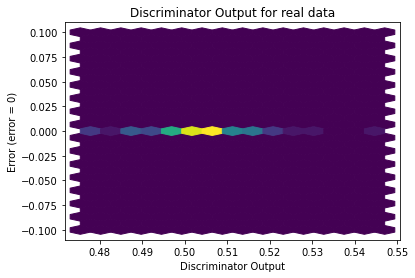

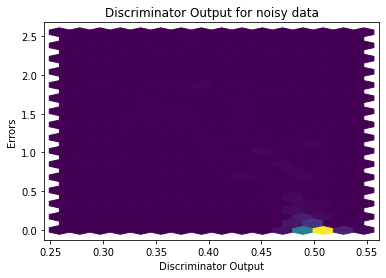

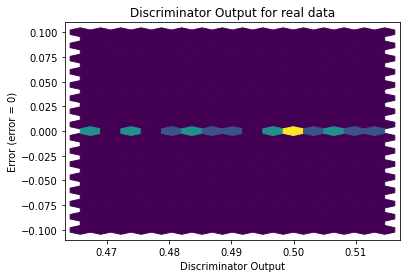

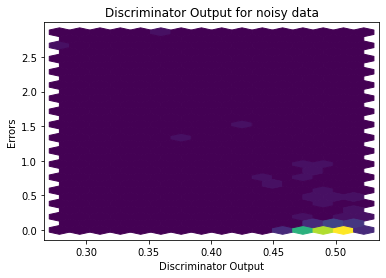

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


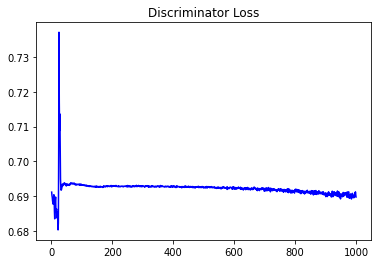

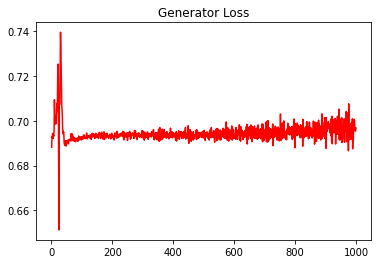

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.19642654557639488


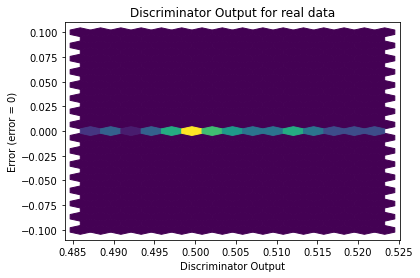

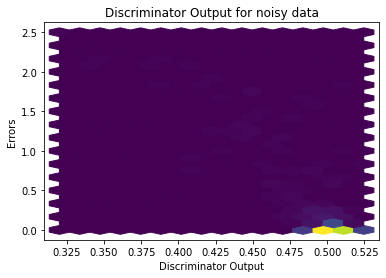

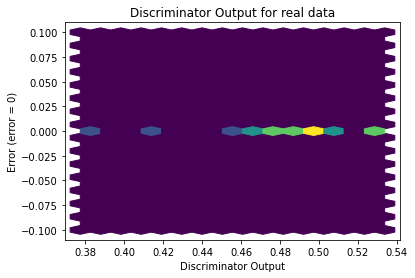

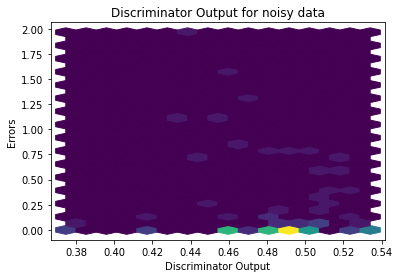

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3180]], requires_grad=True)
